# Neural Networks and Deep Learning Notes

Notes and equations from [neuralnetworksanddeeplearning.com](http://neuralnetworksanddeeplearning.com/)

# Chapter 2

- Backpropagation purpose: compute the gradient of the cost function to use in gradient descent.
- The partial derivatives $\frac{\partial C}{\partial w} and \frac{\partial C}{\partial b}$ tell us how quickly the cost changes w.r.t changes in the weights and biases.

## Warm up: a fast matrix-based approach to computing the output from a neural network.

### Notation

- $w^l_{jk}$ denotes the weight for the connection from the $k$th neuron in the $(l - 1)$th layer to the $j$th neuron in the $l$th layer. In code, this is expressed as a list of matrices: `w[l][j][k]` is the weight from neuron `k` in layer `l-1` to neuron `j` in layer `l`.

![](http://neuralnetworksanddeeplearning.com/images/tikz16.png)

- $b^l_j$ denotes the bias of the $j$th neuron in the $l$th layer. In code, this is expressed as a list of column vectors: `b[l][j]` is the bias from all neurons in layer `l-1` to neuron `j` in layer `l`.
- $a^l_j$ denotes the activation of the $j$th neuron in the $l$th layer. In code this is expressed as a list of column vectors: `a[l][j]` is the activation for neuron `j` in layer `l`.

- The value of $a^l_j$ is computed: $a^l_j = \sigma ( \sum_k w^l_{jk} \cdot a^{l-1}_k + b^l_j)$. Notice we are using the activation from the layer $l - 1$ to compute the activation at layer $l$. 
- The same values can also be vectorized by expressing activations, weights, and biases as vectors: $a^l = \sigma (w^l \cdot a^l-1 + b^l)$.
- $z^l$ is the weighted input to activation function in layer $l$, and it uses the activation of layer $l - 1$: $z^l = w^l \cdot a^{l-1} + b^l$.


## Necessary assumptions about the cost function

- Using the quadractic cost function $C = \frac{1}{2n} \sum_x (y(x) - a^L(x))^2$, where $y$ is the true output and $a^L(x)$ is the output activation given the current weights and biases.
- Cost function can be written as an average of the inidividual sample costs: $C = \frac{1}{n} \sum_x C_x$, $C_x = \frac{1}{2} (y - a^L)^2$
- Cost function can be written as a function of the outputs: $C = C(a^L)$, $C = \frac{1}{2} (y - a^L)^2 = \frac{1}{2} \sum_j (y_j - a^L_j)^2$

## Hadamard product

- Elementwise multiplication of two vectors of the same dimensions.

\begin{eqnarray}
\left[\begin{array}{c} 1 \\ 2 \end{array}\right] 
  \odot \left[\begin{array}{c} 3 \\ 4\end{array} \right]
= \left[ \begin{array}{c} 1 * 3 \\ 2 * 4 \end{array} \right]
= \left[ \begin{array}{c} 3 \\ 8 \end{array} \right].
\tag{28}\end{eqnarray}


In [1]:
# Hadamard example - it seems the np.multiply implicitly does the 
# hadamard if the dimensions are correct.
import numpy as np

a = np.array([[1],[2]])
b = np.array([[3],[4]])
c = np.multiply(a,b)
print(c)

# Is the hadamard the same as the dot product with one matrix transposed? No.
a = np.array([[1],[2]])
b = np.array([[3],[4]])
c = np.dot(a,b.transpose())
print(c)

[[3]
 [8]]
[[3 4]
 [6 8]]


## Four fundamental equations behind backpropagation

### Preliminary: measure of error $\delta^l_j$ 

- $\delta^l_j$ is the error in the $j$th neuron in the $l$th layer. Backprop gives us a procedure to compute this error, which is used to compute the partial derivatives w.r.t. to weight and bias, which are used to compute the gradient.
- $\delta^l_j = \frac{\partial C}{\partial z^l_j}$ is the error at layer $l$ neuron $j$ is the partial derivative of $C$ w.r.t. the weighted input to that neuron ($z^l_j$). "a measure of the error in the neuron".

### 1. Error in the output layer $\delta^L$

Element-wise form:

$\begin{eqnarray} 
  \delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j).
\tag{BP1}\end{eqnarray}$

Vectorized form:

$\begin{eqnarray} 
  \delta^L = (a^L-y) \odot \sigma'(z^L).
\tag{30}\end{eqnarray}$


- $\frac{\partial C}{\partial a^L_j}$ measures how fast the cost is changing as a function of the $j$th output activation. If $C$ doesn't heavily depend on a particular neuron, then the error $\delta^L_j$ will be small.
- $\sigma'(z^L_j)$ measures how fast the activation function $\sigma$ is changing at $z^L_j$. 

### 2. $\delta^l$ in terms of the error in the next layer $\delta^{l+1}$

To find the error of any individual layer:

$\begin{eqnarray}
  \delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^l),
\tag{BP2}\end{eqnarray}$

- This equation gets applied to each layer, starting at the penultimate layer and moving backwards through the network.
- Use BP1 to get $\delta^L$, then BP2 to get $\delta^{L-1}$, $\delta^{L-2}$, ...

### 3. Rate of change of the cost with respect to any bias in the network

Element-wise form:

$\begin{eqnarray}  \frac{\partial C}{\partial b^l_j} =
  \delta^l_j.
\tag{BP3}\end{eqnarray}$

Vectorized form:

$\begin{eqnarray}
  \frac{\partial C}{\partial b} = \delta,
\tag{31}\end{eqnarray}$

### 4. Rate of change of the cost with respect to any weight in the network

Element-wise form:

$\begin{eqnarray}
  \frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j.
\tag{BP4}\end{eqnarray}$

- ROC of $C$ w.r.t. the weight from neuron $k$ in layer $l-1$ to neuron $j$ in layer $l$.
- $a^{l-1}_k$ is the activation of neuron $k$ in the previous layer $l-1$.
- $\delta^l_j$ is the error at neuron $j$ in the current layer $l$.
- "Incoming activation times outgoing error".
- Because this is a product, having a very low activation neuron will yield little change even if the error is high. This is a potential pitfall - "learning slowly".

Simplified form:

$\begin{eqnarray}  \frac{\partial
    C}{\partial w} = a_{\rm in} \delta_{\rm out},
\tag{32}\end{eqnarray}$

## Proofs of the four fundamental equations

TODO

## Backpropagation algorithm summarized

1. **Input**: The raw features for a single training sample expressed as the activation $a^1$.
2. **Feedforward**: For $l = 2,3,...,L$, compute and store the weighted inputs: $z^l = w^l a^{l - 1} + b^l$: and the activations $a^l = \sigma(z^l)$.
3. **Output error**: Compute the output error $\delta^L = (a^L-y) \odot \sigma'(z^L)$.
4. **Backpropagate the error**: Going backwards $l = L - 1, L - 2, ..., 2$, compute each $\delta^{l} = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^{l})$.
5. **Compute, store gradients**: At each layer, store the gradients for weight: $\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$ and for bias: $\frac{\partial C}{\partial b^l_j} = \delta^l_j$. These can be stored as lists of matrices of the same size as the bias and weight matrices.
6. **Return**: return the stored gradient values $\nabla C$, which will be used to update the weights and biases for the next iteration.

## Exercises

1) Suppose we modify a single neuron in a feedforward network so that the output is given by $f(\sum_j w_jx_j + b)$ where $f$ is some function other than the sigmoid. How should we modify backprop for this case?

You would need to be able to compute the derivative of that activation function and replace $\sigma'$ with $f'$ in equations BP1 and BP2.

2) Suppose we replace the usual non-linear $\sigma$ function with $\sigma z = z$ throughout the network. Rewrite the backpropagation algorith for this case.

Not rewriting the entire algorithm, but I believe this would also be a matter of modifying all places that use the derivative of the new $\sigma$.

## Gradient Descent with Backprop

This is just a summary of how backpropagation is used to determine the $\delta w$ and $\delta b$ that are applied at each iteration of gradient descent.

1. Input a set of training examples (`update_by_mini_batch()` function call).
2. For each training example $x$:
    - Set input activation $a^{x,1}$.
    - `back_prop()` function call.
    - Feedforward: for each $l = 2,3,...,L$ compute the weighted input to the next layer: $z^{x,l} = w^la^{x,l-1} + b^l$ and the activation at that layer: $a^{x,l} = \sigma(z^{x,l})$.
    - Output error: Compute the error at the output layer: $\delta^{x,L} = \nabla_aC_x \odot \sigma'(z^{x,L}) = \delta^L = (a^L-y) \odot \sigma'(z^L) = (a^L-y) \odot \sigma'(z^L)$.
    - Backpropagate the error: For each $l = L -1, L -2, ..., 2$ compute $\delta^{x,l} = ((w^{l+1})^T\delta^{x,l+1}) \odot \sigma'(z^{x,l})$. 

3. Gradient descent: use the computed errors to update the weight and bias values:
    - For each $l = L, L - 1,...,2$ update weights and biases according to rules:
    
    $w^l \rightarrow w^l - \frac{\eta}{m}\sum_x \delta^{x,l}(a^{x,l-1})^T$
    
    $b^l \rightarrow b^l - \frac{\eta}{m}\sum_x \delta^{x,l}$
    

## Back-propagation code annotated with the equations.


In [2]:
def back_prop(self, x, y):
        '''Execute back propogation for a single (x,y) (input, output)
        training pair. Return a tuple of the gradients (grad_b, grad_w)
        where grad_b and grad_w are layer-by-layer lists of numpy arrays.
        
        grad_w[l][j][k] is the gradient for the weight from neuron k in layer
        l - 1 to neuron j in layer l.
        
        grad_b[l][j] is the gradient for the bias for neuron j in layer l.
        
        '''
        
        # Both gradients initialized as zeros.
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        
        # Duplicate forward prop, tracking a and z to compute deltas.
        a = x   # First activation is the input.
        A = [a] # Store the activations.
        Z = []  # Store the weighted inputs to activation.
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, a) + b # Compute and store the weighted input to the activation.
            Z.append(z)
            a = sigmoid(z)       # Compute and store the sigmoid activation.
            A.append(a)
            
        # Backward pass, compute the error first.
        output_delta = quadratic_cost_deriv(A[-1], y) * sigmoid_deriv(Z[-1]) # Eq. BP1.
        grad_b[-1] = output_delta # Eq. BP3. Bias gradient at the last layer is the output delta.
        grad_w[-1] = np.dot(delta, A[-2].transpose()) # Eq. BP4.
        
        # Python negative indexing used to loop backward through layers.
        for l in range(2, self.num_layers):
            sd = sigmoid_deriv(Z[-l]) 
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sd # Eq. BP2.
            grad_b[-l] = delta # Eq. BP3.
            grad_w[-l] = np.dot(delta, A[-l - 1].transpose()) # Eq. BP4.
        
        return grad_b, grad_w

# Fully matrix-based backpropogation over a mini-batch

Using TensorFlow backend.


SGD Epoch 000: 07382/08000, cost = 0.018652, duration = 5 seconds.
SGD Epoch 001: 07407/08000, cost = 0.015068, duration = 5 seconds.
SGD Epoch 002: 07537/08000, cost = 0.012417, duration = 5 seconds.
SGD Epoch 003: 07556/08000, cost = 0.009647, duration = 5 seconds.
SGD Epoch 004: 07556/08000, cost = 0.010217, duration = 5 seconds.
SGD Epoch 005: 07600/08000, cost = 0.008530, duration = 5 seconds.
SGD Epoch 006: 07595/08000, cost = 0.010958, duration = 5 seconds.
SGD Epoch 007: 07619/08000, cost = 0.007883, duration = 6 seconds.
SGD Epoch 008: 07598/08000, cost = 0.008295, duration = 9 seconds.
SGD Epoch 009: 07639/08000, cost = 0.007024, duration = 8 seconds.
SGD Epoch 010: 07606/08000, cost = 0.007889, duration = 8 seconds.
SGD Epoch 011: 07625/08000, cost = 0.007901, duration = 9 seconds.
SGD Epoch 012: 07687/08000, cost = 0.006679, duration = 7 seconds.
SGD Epoch 013: 07669/08000, cost = 0.007158, duration = 7 seconds.
SGD Epoch 014: 07675/08000, cost = 0.007041, duration = 7 seco

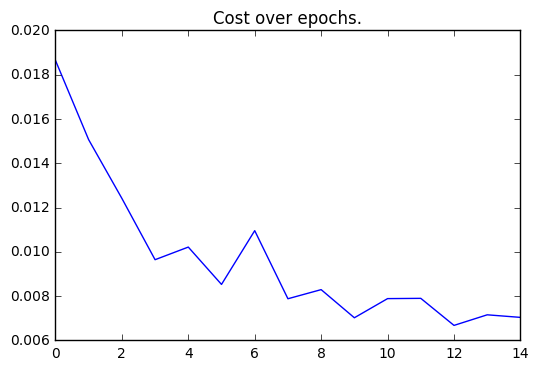

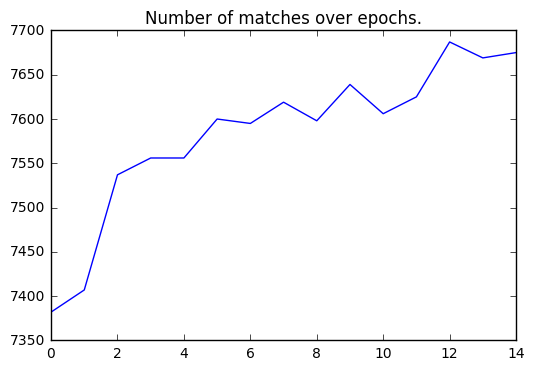

In [3]:
import numpy as np
import nndl_helpers as helpers
import random
import math
import matplotlib.pyplot as plt
import time
import sys
from __future__ import print_function

np.random.seed(11)

# Static functions called from within the Network class.
def sigmoid(z):
    '''Sigmoid activation.'''
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_deriv(z):
    '''Derivative of the sigmoid activation.
    Used in back prop to compute the output error and the layer errors.'''
    return np.multiply(sigmoid(z), (np.ones(z.shape) - sigmoid(z)))
    #     return sigmoid(z) * (np.ones(z.shape) - sigmoid(z))

def quadratic_cost(examples, outputs):
    '''Compute the quadratic cost for the outputs relative the 
    examples (x,y) pairs. Assumes that outputs is a list of column 
    vectors representing the output activations for the given examples.'''
    n = len(examples)
    error_sum = 0
    for ((x,y), o) in zip(examples, outputs):
        error_sum += math.pow(np.sum(y - o), 2)
    return (1.0 / (2.0*n)) * error_sum

def quadratic_cost_deriv(output_activations, y):
    '''Derivative of the quadratic cost function. Used in back prop
    to compute the output error. Assumes output activations and y are
    equal-sized column vectors.'''
    return (output_activations - y)

class Network(object):

    def __init__(self, sizes=[10,10]):
        '''Initialize member variables and randomly initialize 
        bias and weight values.'''
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        
        # By convention, there are no weights and biases for input layer.
        # Biases are a (layer size X 1) column vector.
        self.biases = [np.random.randn(sz, 1) for sz in sizes[1:]]
        
        # Each layer has a (m x n) matrix of weights,
        # where m is the size of the layer and n is the size of 
        # the subsequent layer. 
        # e.g. layer 1 has size 10, layer 2 has size 11, then layer 1's
        # weights are a (10 x 11) matrix.
        self.weights = [np.random.randn(m,n) 
                        for n,m in zip(sizes[:-1],sizes[1:])]
        return
    
    def SGD(self, train, epochs=30, mini_batch_size=10, eta=3.0, test_data=None):
        '''Stochastic gradient descent trains the NN in mini-batches.
        train should be a list of tuples (x,y) representing the training
        samples and their correct outputs.'''
        
        correct_list = []
        cost_list = []
        
        # SGD broken into epochs.
        # Each epoch shuffles the training data into mini-batches
        # and iterates over them to incrementally update weights
        # and biases using back propogation.
        for epoch in range(epochs):
            
            # Shuffle the training data and split it into
            # non-overlapping mini-batches.
            random.shuffle(train)
            mini_batches = [
                train[k:k+mini_batch_size]
                for k in range(0, len(train), mini_batch_size)]
            
            t0 = time.time()
            
            # Use each of the mini batches to update biases
            # and weights using back propogation.
            for mb in mini_batches:
                self.update_by_mini_batch(mb, eta)
            
            t1 = time.time()
                
            # Evaluate on test data if given, print results.
            if test_data:
                correct, cost = self.evaluate(test_data)
                correct_list.append(correct)
                cost_list.append(cost)
                print("SGD Epoch %03d: %05d/%05d, cost = %lf, duration = %d seconds." %
                     (epoch, correct, len(test_data), cost, t1 - t0))
            else:
                print("SGD Epoch %d complete, duration = %d seconds." % (epoch, t1 - t0))
        
        return correct_list, cost_list
    
    def update_by_mini_batch(self, mini_batch, eta):
        '''Use back propogation algorithm to compute the gradients
        for each (x,y) pair in the mini_batch. Use those gradients
        to update self.weights and self.biases at each iteration.'''
        
        # Gradient sums are the sums of the weight and bias gradients for each neuron
        # over all of the samples in the mini batch.
        grad_b_mean, grad_w_mean = self.back_prop_matrix(mini_batch)
    
        self.biases = [b - (eta * gbmean) 
                       for b, gbmean in zip(self.biases, grad_b_mean)]
        self.weights = [w - (eta * gwmean) 
                        for w, gwmean in zip(self.weights, grad_w_mean)]
            
        return
    
    def back_prop_matrix(self, batch):
        '''Matrix-based backpropagation algorithm based on last problem in
        NNDL chapter 2.'''
        
        # X is an (n x b) matrix, where b is the number of samples in the batch.
        # "We can begin with a matrix X whose columns are the vectors in the mini-batch."
        X = np.matrix([x[:,0] for (x,y) in batch]).transpose()
        
        # Y is a (10 x b) row vector, where each column contains the 10 binary
        # classifications of the corresponding column in X.
        Y = np.array([y[:,0] for (x,y) in batch]).transpose()
        
        # Forward propagation.
        # "We forward-propogate by multiplying by the weight matrices,
        # adding a suitable matrix for the bias term, and applying the 
        # sigmoid function everywhere."
        
        A = X       # A is the matrix of activations, starts as all inputs.
        A_seq = [A] # Track the sequence of activation matrices.
        Z_seq = []  # Track the sequence of weighted input matrices.
        
        for b, w in zip(self.biases, self.weights):
            Z = np.dot(w, A) + b # Apply weight and bias to entire batch in parallel.
            A = sigmoid(Z)       # Compute sigmoid of entire batch in parallel.
            Z_seq.append(Z)      # Store weighted inputs.
            A_seq.append(A)      # Store activations.
        
        # Backward propagation.
        # "We backpropagate along similar lines.

        # Eq. BP1: compute the output error.
        # This will be a (10 x b) matrix. Each row corresponds to a digit,
        # each column corresponds to a sample from the batch.
        D = np.multiply((A_seq[-1] - Y), sigmoid_deriv(Z_seq[-1]))
        
        # Eq. BP3: bias gradient at the last layer is the output delta.
        grad_b = [D]
        
        # Eq. BP4: weight gradient at the last layer.
        grad_w = [np.dot(D, A_seq[-2].transpose())]
        
        # Back propagate through the layers.
        for l in range(2, self.num_layers):
            # Eq. BP2: compute error at a layer.
            D = np.multiply(np.dot(self.weights[-l + 1].transpose(), D), sigmoid_deriv(Z_seq[-l]))
            # Eq. BP3.
            grad_b = [D] + grad_b
            # Eq. BP4.
            grad_w = [np.dot(D, A_seq[-l - 1].transpose())] + grad_w
        
        # Compute the mean gradients for each neuron at each layer
        # to make modifying the biases and weights simple. Each bias
        # matrix has a column for each sample in the batch, so it needs to
        # be summed row-wise using np.sum. This is not the case for the
        # weight matrices, and I still don't fully understand why, but
        # it ends up working out.
        grad_b_mean = [(np.sum(b, axis=1) / len(batch)) for b in grad_b]
        grad_w_mean = [(w / len(batch)) for w in grad_w]
        
        return grad_b_mean, grad_w_mean
    
    def back_prop(self, x, y):
        '''Execute back propogation for a single (x,y) (input, output)
        training pair. Return a tuple of the gradients (grad_b, grad_w)
        where grad_b and grad_w are layer-by-layer lists of numpy arrays.
        
        grad_w[l][j][k] is the gradient for the weight from neuron k in layer
        l - 1 to neuron j in layer l.
        
        grad_b[l][j] is the gradient for the bias for neuron j in layer l.
        
        '''
        
        # Both gradients initialized as zeros.
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        
        # Duplicate forward prop, tracking a and z to compute deltas.
        a = x   # First activation is the input.
        A = [a] # Store the activations.
        Z = []  # Store the weighted inputs to activation.
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, a) + b # Compute and store the weighted input to the activation.
            Z.append(z)
            a = sigmoid(z)       # Compute and store the sigmoid activation.
            A.append(a)
            
        # Backward pass, compute the error first.
        output_delta = quadratic_cost_deriv(A[-1], y) * sigmoid_deriv(Z[-1]) # Eq. BP1.
        grad_b[-1] = output_delta # Eq. BP3. Bias gradient at the last layer is the output delta.
        grad_w[-1] = np.dot(delta, A[-2].transpose()) # Eq. BP4.
        
        # Python negative indexing used to loop backward through layers.
        for l in range(2, self.num_layers):
            sd = sigmoid_deriv(Z[-l]) 
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sd # Eq. BP2.
            grad_b[-l] = delta # Eq. BP3.
            grad_w[-l] = np.dot(delta, A[-l - 1].transpose()) # Eq. BP4.
        
        return grad_b, grad_w
        
    def evaluate(self, validate):
        '''Evaluate using the member variable biases, weights and the given
        validation data. The validation data should be a list of tuples (x,y).
        Return the number of correct classifications and the cost.'''
        
        # Compute outputs for each (x,y) pair using forward prop.
        outputs = [self.forward_prop(x) for (x,y) in validate]
        
        num_matches = sum([int(np.argmax(o) == np.argmax(y))
                          for (o, (x,y)) in zip(outputs, validate)])
        
        cost = quadratic_cost(validate, outputs)
        
        return num_matches, cost
    
    def forward_prop(self, inputs):
        '''Computes the network output given the input a.
        Uses biases and weights to multiply the activations as
        they pass through the network.'''
        
        # Inputs are treated as the first activation.
        a = inputs
        
        # The activation at layer i is the sigmoid function
        # evaluated on the current weights and biases and the
        # activation from layer i - 1.
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w,a) + b)
        
        # The output is the last activation.
        outputs = a
        return outputs

# Retrieve 60000 training, 8000 testing, 2000 validation samples.
train, test, validate = helpers.get_mnist_data()

t0 = time.time()
net = Network([784,60,60,10])
num_matches_list, cost_list = net.SGD(train, epochs=15, mini_batch_size=10, eta=3.0, test_data=test)
t1 = time.time()
print('Training time in seconds = %d' % (t1 - t0))

num_matches, cost = net.evaluate(validate)
print('Validation: %d / %d, %.4lf, cost = %.4lf' %
    (num_matches, len(validate), num_matches / len(validate), cost))

plt.title('Cost over epochs.')
plt.plot(cost_list)
plt.show()

plt.title('Number of matches over epochs.')
plt.plot(num_matches_list)
plt.show()


# Conclusion

- Gradient descent boils down to those four equations (BP1, BP2, BP3, BP4).
- Good summary: "The backpropagation algorithm is a clever way of keeping track of small perturbations to the weights (and biases) as they propagate through the network, reach the output, and then affect the cost."
- The matrix-based back-propagation implementation ends up being ~2x faster than the original implementation. On an i7860 @ 2.80 GHz, matrix-based takes ~15 seconds per epoch while regular takes ~30 seconds per epoch.
- To debug the matrix-based implementation, it is helpful to print out the sizes of the weight and bias matrices and compare them to the other implementation.

